# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib as mp
import math as mh
from matplotlib import pyplot as plt
import scipy as sp
from scipy import stats as st




## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('/Users/d.leon/Desktop/TRIPLETEN/PROYECTO 5/megaline_users.csv')
calls = pd.read_csv('/Users/d.leon/Desktop/TRIPLETEN/PROYECTO 5/megaline_calls.csv')
messages = pd.read_csv('/Users/d.leon/Desktop/TRIPLETEN/PROYECTO 5/megaline_messages.csv')
internet = pd.read_csv('/Users/d.leon/Desktop/TRIPLETEN/PROYECTO 5/megaline_internet.csv')
plans = pd.read_csv('/Users/d.leon/Desktop/TRIPLETEN/PROYECTO 5/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [127]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [128]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- LOS NOMBRES DE LAS COLUMNAS ESTAN DE MANERA CORRECTA, NO SE NECESITAN MODIFICACIONES.
- LOS TIPOS DE TEXTO SON CORRRECTOS DEPENDIENDO A SU CONTENIDO ASI QUE TAMPOCO NECESITAN CORRECCIONES.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [129]:
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)


print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes
None


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [130]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [131]:
# Imprime una muestra de datos para usuarios
print(users.sample(10))


     user_id first_name last_name  age  \
281     1281       Zack     Hardy   39   
226     1226     Denver   Harrell   64   
385     1385     Nohemi  Erickson   52   
402     1402      Jesus     Berry   25   
264     1264     Jessie      Hill   69   
305     1305      Gwenn     Gross   18   
44      1044     Devora  Galloway   74   
491     1491     Terina    Jensen   22   
473     1473       Kirk     Velez   61   
436     1436    Jennine    Kinney   69   

                                                city    reg_date      plan  \
281            Charlotte-Concord-Gastonia, NC-SC MSA  2018-07-23      surf   
226         Riverside-San Bernardino-Ontario, CA MSA  2018-03-15  ultimate   
385        New York-Newark-Jersey City, NY-NJ-PA MSA  2018-01-19      surf   
402        New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-11      surf   
264           Los Angeles-Long Beach-Anaheim, CA MSA  2018-05-03  ultimate   
305           Los Angeles-Long Beach-Anaheim, CA MSA  2018-05-08     

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- TODOS LOS DATOS SON CORRECTOS EN LOS NOMBRES DE LAS COLUMNAS.
- EL TIPO DE ELEMENTOS ES CORRECTO AL CONTENIDO QUE TIENE CADA COLUMNA A EXCEPCION DEL DATE TIME, TENDRE QUE CORREGIRLO.
- NO HAY ELEMENTOS FALTANTES EN NINGUNA COLUMNA A EXCEPCION DEL 'CHURN_DATE' PERO ES PORQUE LOS USUARIOS NO HAN DEJADO DE UTILIZAR EL SERVICIO.
- CAMBIARE EL TIPO DE ELEMENTO EN EL USERR ID PARA QUE SEA UN STRING.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [132]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.rename(columns= {'plan':'plan_name'}, inplace=True)
users['user_id'] = users['user_id'].astype(str)
print(users.info())

print(users.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB
None
    user_id first_name last_name  age  \
462    1462     Lesley   Workman   20   
82     1082    Dominic      Witt   64   
87     1087     Lenard  Atkinson   45   

                                                 city   reg_date plan_name  \
462              Las Vegas-Henderson-Paradise, NV MSA 2018-09-05  ultimate   
82                  

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [133]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [134]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(10))

              id  user_id   call_date  duration
55501    1199_44     1199  2018-11-22     11.83
126100  1446_344     1446  2018-12-28      7.34
110234  1389_280     1389  2018-10-03     11.54
136695  1495_135     1495  2018-11-12      3.49
111024  1390_473     1390  2018-12-13      0.00
124372  1439_240     1439  2018-11-30      7.66
3805     1015_50     1015  2018-12-12      0.00
107318   1381_55     1381  2018-10-17      0.52
123197  1434_539     1434  2018-03-29      0.96
41287   1152_228     1152  2018-11-29      9.49


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- LOS ID DE LLAMADAS INICIAN CON EL ID DEL USUARIO Y LUEGO CON EL NUMERO DE LLAMADA QUE ES.
- LA DURACION DE LAS LLAMADAS ES EN MINUTOS, SIN EMBARGO LA COLUMNA DE DURACION ESTA EN UNA BASE DE CENTIMOS, CREO QUE PODRIAMOS CORREGIRLO A QUE SE BASE A MINUTOS ESPECIFICAMENTE (DE 60 EN 60 SEGUNDOS) AGREGANDO UNA COLUMNA DONDE SE IDENTIFIQUE COMO MINUTOS REALES.
- CAMBIAR EL NOMBRE DE LA COLUMNA id POR call_id, ESTO PARA TENER INFORMACION MAS CONCRETA.
- CAMBIAR EL TIPO DE INFORMACION EN LA COLUMNA DE FECHA.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [135]:
#Cambio de nombre de columna 'id'
calls.rename(columns={'id':'call_id'}, inplace=True)
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [136]:
#Agregar una columna nueva con los minutos reales.
calls['real_minutes'] = calls['duration'].astype(int) + (calls['duration']%1)*60/100

print(calls.info())
print('-------------------------')
print(calls.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   call_id       137735 non-null  object        
 1   user_id       137735 non-null  int64         
 2   call_date     137735 non-null  datetime64[ns]
 3   duration      137735 non-null  float64       
 4   real_minutes  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.3+ MB
None
-------------------------
         call_id  user_id  call_date  duration  real_minutes
75029   1264_381     1264 2018-12-22     10.06        10.036
24817   1095_136     1095 2018-09-28      2.58         2.348
40559    1150_10     1150 2018-09-29      5.87         5.522
65038   1236_319     1236 2018-06-06      9.50         9.300
115800   1406_26     1406 2018-08-04      0.00         0.000


## OBSERVACIONES:

PODRIAMOS PENSAR QUE LAS LLAMADAS QUE TIENEN UNA DRURACION DE 0.00 ES PORQUE EN ESTAS OCACIONES LA PERSONA A LA QUE LLAMABAN NO RESPONDIERON.

## Mensajes

In [137]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [138]:
# Imprime una muestra de datos para los mensajes

print(messages.sample(10))

             id  user_id message_date
68935    1447_3     1447   2018-12-10
45362    1305_2     1305   2018-08-01
5891     1055_9     1055   2018-06-03
73818  1474_186     1474   2018-09-28
64409   1410_64     1410   2018-10-12
15129  1101_186     1101   2018-06-12
10277  1076_642     1076   2018-12-21
28446  1174_236     1174   2018-07-21
54442  1343_544     1343   2018-10-11
52964   1339_98     1339   2018-08-06


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- PASA LO MISMO QUE PASABA CON LAS LLAMADAS, LA COLUMNA id PUEDE CONFUNDIR, ASI QUE CAMBIARE EL NOMBRE A message_id.
- CAMBIAR A TIPO DE FECHA LA COLUMNA message_date.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [139]:
messages.rename(columns={'id':'message_id'}, inplace=True)
messages['message_date'] = pd.to_datetime(messages['message_date'])
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [140]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [141]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head(10))


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- CORREGIRE COMO ANTERIORMENTE EL NOMBREE DE LA COLUMNA id  PARA DAR UNA INFORMACION MAS CLARA.
- CAMBIO DE TIPO EN FECHA.
- AQUI PODREMOS OBSERVAR QUE ESTA EN MEGABYTES Y TENDREMOS QUE CONVERTIRLO A GB.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [142]:
internet.rename(columns={'id':'session_id'}, inplace=True)
internet['session_date'] = pd.to_datetime(internet['session_date'])
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [143]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20        10.0             0.03            0.03      surf  
1               70         7.0             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [144]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['year_month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'year_month'])['user_id'].size().reset_index(name='total_calls')

print(calls_per_month.head(10))

   user_id year_month  total_calls
0     1000    2018-12           16
1     1001    2018-08           27
2     1001    2018-09           49
3     1001    2018-10           65
4     1001    2018-11           64
5     1001    2018-12           56
6     1002    2018-10           11
7     1002    2018-11           55
8     1002    2018-12           47
9     1003    2018-12          149


In [145]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['year_month'] = calls['call_date'].dt.to_period('M')
minutes_per_month = calls.groupby(['user_id', 'year_month'])['real_minutes'].count().reset_index(name='total_minutes')

print(minutes_per_month.head(10))

   user_id year_month  total_minutes
0     1000    2018-12             16
1     1001    2018-08             27
2     1001    2018-09             49
3     1001    2018-10             65
4     1001    2018-11             64
5     1001    2018-12             56
6     1002    2018-10             11
7     1002    2018-11             55
8     1002    2018-12             47
9     1003    2018-12            149


In [146]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['year_month'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'year_month'])['message_id'].count().reset_index(name='total_messages')

print(messages_per_month.head(10))

   user_id year_month  total_messages
0     1000    2018-12              11
1     1001    2018-08              30
2     1001    2018-09              44
3     1001    2018-10              53
4     1001    2018-11              36
5     1001    2018-12              44
6     1002    2018-10              15
7     1002    2018-11              32
8     1002    2018-12              41
9     1003    2018-12              50


In [147]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['year_month'] = internet['session_date'].dt.to_period('M')
internet_per_month = internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index(name='total_gb')
internet_per_month['total_gb'] = internet_per_month['total_gb'].apply(lambda x: mh.ceil(x / 1024))


print(internet_per_month.head(10))

   user_id year_month  total_gb
0     1000    2018-12         2
1     1001    2018-08         7
2     1001    2018-09        14
3     1001    2018-10        22
4     1001    2018-11        19
5     1001    2018-12        19
6     1002    2018-10         7
7     1002    2018-11        19
8     1002    2018-12        15
9     1003    2018-12        27


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [148]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
info_per_user = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'year_month'], how='outer')
info_per_user = pd.merge(info_per_user, messages_per_month, on=['user_id', 'year_month'], how='outer')
info_per_user = pd.merge(info_per_user, internet_per_month, on=['user_id', 'year_month'], how='outer')
info_per_user['user_id'] = info_per_user['user_id'].astype(str)

print(info_per_user.info())
print(info_per_user.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   object   
 1   year_month      2293 non-null   period[M]
 2   total_calls     2258 non-null   float64  
 3   total_minutes   2258 non-null   float64  
 4   total_messages  1806 non-null   float64  
 5   total_gb        2277 non-null   float64  
dtypes: float64(4), object(1), period[M](1)
memory usage: 107.6+ KB
None
     user_id year_month  total_calls  total_minutes  total_messages  total_gb
273     1061    2018-10         95.0           95.0            54.0      17.0
575     1122    2018-09         59.0           59.0            16.0      22.0
658     1138    2018-11         57.0           57.0             7.0      17.0
598     1127    2018-07         35.0           35.0            10.0      22.0
561     1120    2018-05         58.0           58.0    

In [149]:
# Rellenar los espacion NaN
info_per_user = info_per_user.fillna(0)

print(info_per_user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   object   
 1   year_month      2293 non-null   period[M]
 2   total_calls     2293 non-null   float64  
 3   total_minutes   2293 non-null   float64  
 4   total_messages  2293 non-null   float64  
 5   total_gb        2293 non-null   float64  
dtypes: float64(4), object(1), period[M](1)
memory usage: 107.6+ KB
None


In [150]:
# Añade la información de la tarifa

# Primero seleccionare las columnas necesarias del archivo de usuarios
users_plans = users[['user_id', 'plan_name']]
# Combino con mi dataframe
full_data = pd.merge(info_per_user, users_plans, how='left', on='user_id')
# Combino con el DF de plans
full_data = pd.merge(full_data, plans, how='left', on='plan_name')

print(full_data.sample(3))



     user_id year_month  total_calls  total_minutes  total_messages  total_gb  \
1353    1291    2018-10         91.0           91.0            14.0      21.0   
1985    1425    2018-11         33.0           33.0            14.0      24.0   
234     1055    2018-06         27.0           27.0            68.0      11.0   

     plan_name  messages_included  mb_per_month_included  minutes_included  \
1353      surf                 50                  15360               500   
1985      surf                 50                  15360               500   
234       surf                 50                  15360               500   

      usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
1353               20        10.0             0.03            0.03  
1985               20        10.0             0.03            0.03  
234                20        10.0             0.03            0.03  


In [151]:
# Reorganizacion de columnas para una mejor estructura y lectura
# Reubicacion de columna 'plan_name'
plan_name_col = full_data.pop('plan_name')
full_data.insert(2, 'plan_name', plan_name_col)

# Columna 'minutes_included'
minutes_included_col = full_data.pop('minutes_included')
full_data.insert(6, 'minutes_included', minutes_included_col)

# Columna 'usd_per_minute'
usd_per_minute_col = full_data.pop('usd_per_minute')
full_data.insert(7, 'usd_per_minute', usd_per_minute_col)

# Columna 'messages_included'
messages_included_col = full_data.pop('messages_included')
full_data.insert(9, 'messages_included', messages_included_col)

# Columna 'usd_per_message'
usd_per_message_col = full_data.pop('usd_per_message')
full_data.insert(10, 'usd_per_message', usd_per_message_col)


In [152]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   object   
 1   year_month             2293 non-null   period[M]
 2   plan_name              2293 non-null   object   
 3   total_calls            2293 non-null   float64  
 4   total_minutes          2293 non-null   float64  
 5   total_messages         2293 non-null   float64  
 6   minutes_included       2293 non-null   int64    
 7   usd_per_minute         2293 non-null   float64  
 8   total_gb               2293 non-null   float64  
 9   messages_included      2293 non-null   int64    
 10  usd_per_message        2293 non-null   float64  
 11  mb_per_month_included  2293 non-null   int64    
 12  usd_monthly_pay        2293 non-null   int64    
 13  usd_per_gb             2293 non-null   float64  
dtypes: float64(7), int64(4),

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [153]:
# Calcula el ingreso mensual para cada usuario
def extra_usd (user):
    # Costo adicional por minutos
    extra_minutes = max(0, user['total_minutes'] - user['minutes_included']) * user['usd_per_minute']
    # Costo adicional por mensajes
    extra_messages = max(0, user['total_messages'] - user['messages_included']) * user['usd_per_message']
    # Costo adicional por Gb
    mb_conversion = mh.ceil(user['mb_per_month_included'] / 1024)
    extra_gb = max(0, user['total_gb'] - mb_conversion) * user['usd_per_gb']
    # Sumas de valores
    extra_total = extra_minutes + extra_messages + extra_gb
    return extra_total


In [154]:
# Agregar nueva columna con el costo extra
full_data['extra_cost'] = full_data.apply(extra_usd, axis=1)
full_data['extra_cost'] = full_data['extra_cost'].astype(float)

# Agregar nueva columna con el costo total
full_data['total_cost'] = full_data['extra_cost'] + full_data['usd_monthly_pay']

# Imprimir resultados
print(full_data.info())
print(full_data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2293 non-null   object   
 1   year_month             2293 non-null   period[M]
 2   plan_name              2293 non-null   object   
 3   total_calls            2293 non-null   float64  
 4   total_minutes          2293 non-null   float64  
 5   total_messages         2293 non-null   float64  
 6   minutes_included       2293 non-null   int64    
 7   usd_per_minute         2293 non-null   float64  
 8   total_gb               2293 non-null   float64  
 9   messages_included      2293 non-null   int64    
 10  usd_per_message        2293 non-null   float64  
 11  mb_per_month_included  2293 non-null   int64    
 12  usd_monthly_pay        2293 non-null   int64    
 13  usd_per_gb             2293 non-null   float64  
 14  extra_cost             2

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

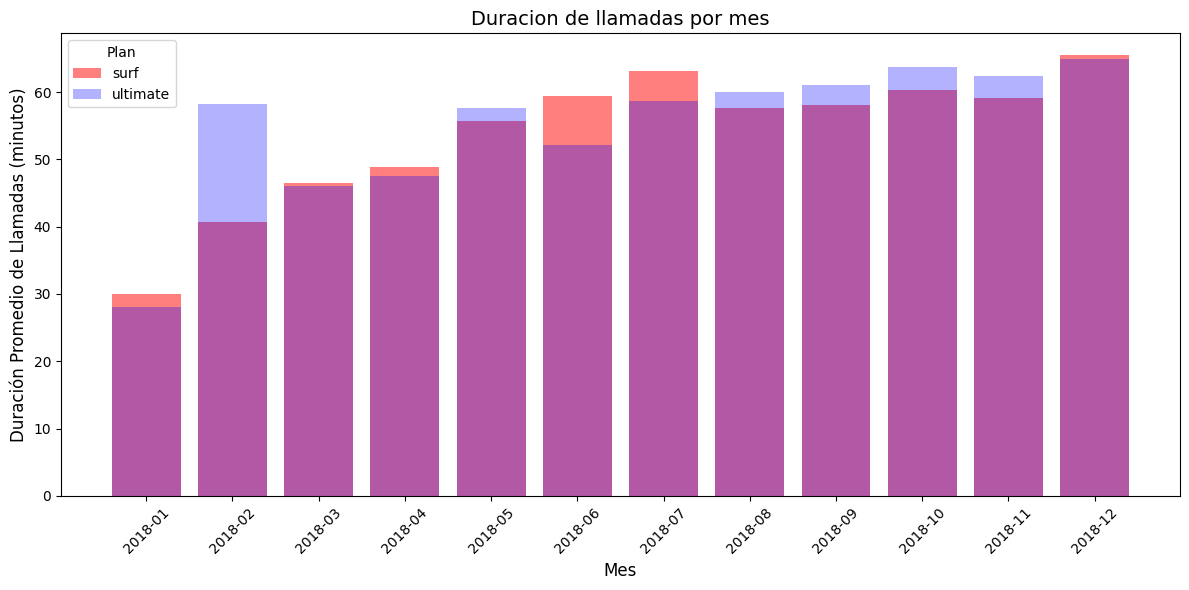

In [155]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_call_duration = full_data.groupby(['plan_name', 'year_month'])['total_minutes'].mean().reset_index()
avg_call_duration['year_month'] = avg_call_duration['year_month'].astype(str) 

# Datos para el grafico
avg_plans = avg_call_duration['plan_name'].unique()
x_label = avg_call_duration['year_month'].unique()

# Crear grafico de barras
fig, ax = plt.subplots(figsize=(12,6))
for plan in avg_plans:
    data = avg_call_duration[avg_call_duration['plan_name'] == plan]

    # Atenuar el color de un plan específico, por ejemplo 'Plan Básico'
    if plan == 'surf':
        ax.bar(data['year_month'], data['total_minutes'], label=plan, alpha=0.5, color='red')
    else:
        ax.bar(data['year_month'], data['total_minutes'], label=plan, alpha=0.3, color='blue')    

ax.set_title('Duracion de llamadas por mes', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Duración Promedio de Llamadas (minutos)', fontsize=12)
ax.legend(title="Plan")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

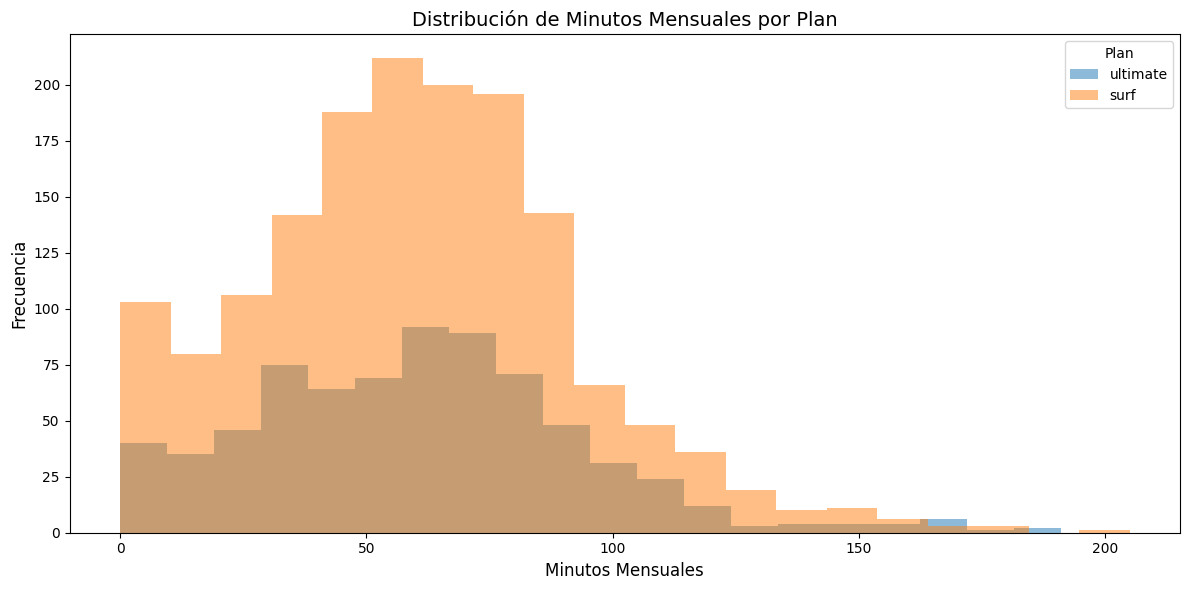

In [156]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plans = full_data['plan_name'].unique()
fig, ax = plt.subplots(figsize=(12,6))

for plan in plans:
    data = full_data[full_data['plan_name'] == plan]['total_minutes']
    ax.hist(data, bins=20, alpha=0.5, label=plan)

# Personalizar el gráfico
ax.set_title('Distribución de Minutos Mensuales por Plan', fontsize=14)
ax.set_xlabel('Minutos Mensuales', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.legend(title="Plan")
plt.tight_layout()

# Mostrar gráfico
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [157]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calculo de la media
call_duration_mean = full_data['total_minutes'].mean()

# Calculo de la varianza
call_duration_var = full_data['total_minutes'].var()

# Imprimimos resultados

print('La media es:', call_duration_mean)
print('la varianza es:', call_duration_var)

La media es: 60.06759703445268
la varianza es: 1049.9260569195724


/var/folders/mw/frc8gt413314ssp_571x0spw0000gn/T/ipykernel_3189/3227588995.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box.boxplot(box_data, labels=box_plans, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))


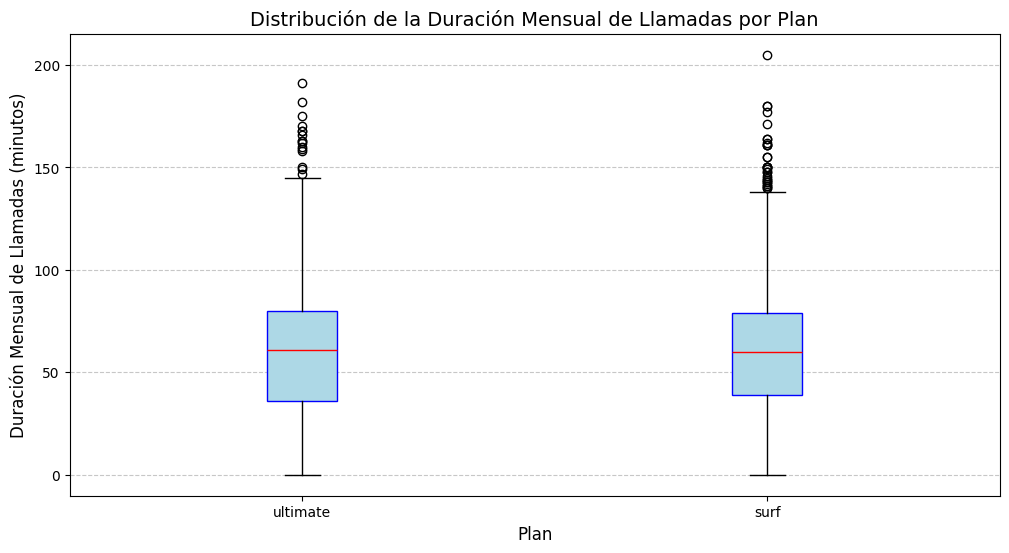

In [158]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Preparacion de datos
box_plans = full_data['plan_name'].unique()
box_data = [full_data[full_data['plan_name'] == plan]['total_minutes']for plan in box_plans]

# Creacion de diagrama
fig, box = plt.subplots(figsize=(12, 6))
box.boxplot(box_data, labels=box_plans, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))

# Personalizar el gráfico
box.set_title('Distribución de la Duración Mensual de Llamadas por Plan', fontsize=14)
box.set_xlabel('Plan', fontsize=12)
box.set_ylabel('Duración Mensual de Llamadas (minutos)', fontsize=12)
box.grid(axis='y', linestyle='--', alpha=0.7)

plt.show(box)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

CONCLUSIONES

- LAS MEDIANAS SON MUY SIMILARES RESPECTO A LOS PLANES, SIN EMBARGO LOS DEL PLAN ULTIMATE, DURAN UN POCO MAS EN SUS LLAMADAS, ESTO TAMBIEN LO PODEMOS OBSERVAR YA QUE EL CENTRO DE DATOS ES MAS GRRANDE QUE DEL PLAN SURF.
- AMBOS PLANES TIENEN UN SESGO HACIA EL CUARTIL 3, SIN EMBARGO EN EL PLAN ULTIMATE, SE DENOTA UN POCO MAS.
- EL PLAN SURF TIENE MAS OUTLINERS EN SU DISTRIBUCION DE DATOS.

CON ESTO, PODRIA DECIR QUE SI, EFECTIVAMENTE EL COMPORTAMIENTO VARIA DEPENDIENDO AL PLAN, YA QUE LOS DEL PLAN ULTIMATE SI UTILIZAN MAS MINUTOS QUE LOS DEL PLAN SURF, QUE EN ESTA OCASION, SE PUEDE OBSERVAR QUE SU COMPORTAMIENTO EN LOS MINUTOS ES MAS ESTANDAR QUE EN EL PLAN ULTIMATE.

### Mensajes

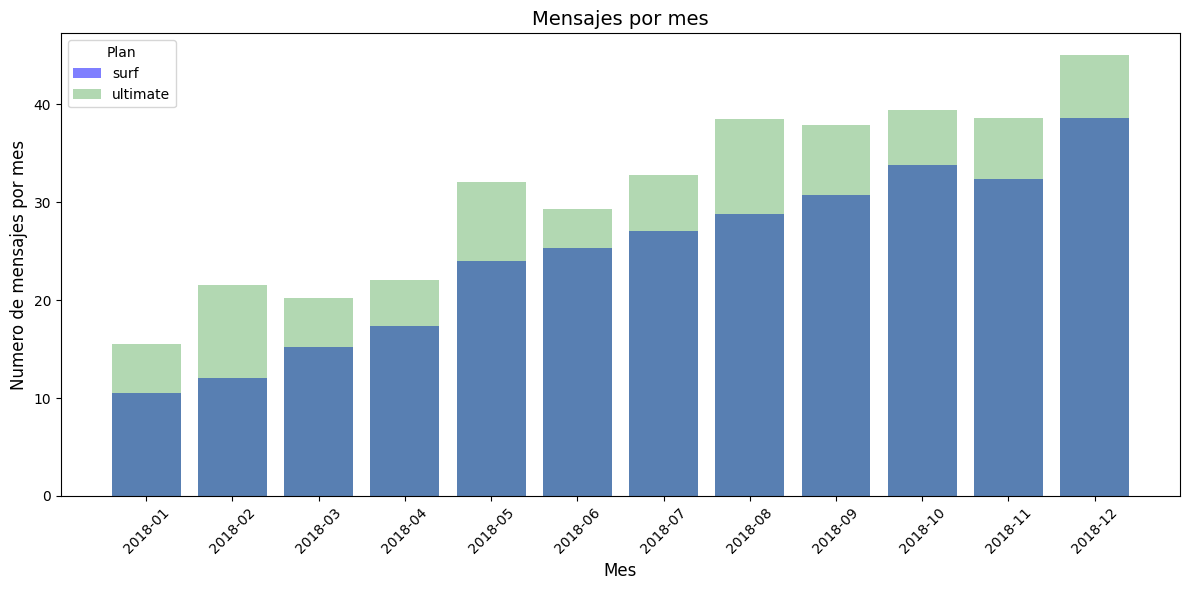

In [159]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages_duration = full_data.groupby(['plan_name', 'year_month'])['total_messages'].mean().reset_index()
avg_messages_duration['year_month'] = avg_messages_duration['year_month'].astype(str) 

# Datos para el grafico
avg_plans = avg_call_duration['plan_name'].unique()
x_label = avg_call_duration['year_month'].unique()

# Crear grafico de barras
fig, ax = plt.subplots(figsize=(12,6))
for plan in avg_plans:
    data = avg_messages_duration[avg_call_duration['plan_name'] == plan]

    # Atenuar el color de un plan específico, por ejemplo 'Plan Básico'
    if plan == 'surf':
        ax.bar(data['year_month'], data['total_messages'], label=plan, alpha=0.5, color='blue')
    else:
        ax.bar(data['year_month'], data['total_messages'], label=plan, alpha=0.3, color='green')  


ax.set_title('Mensajes por mes', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Numero de mensajes por mes', fontsize=12)
ax.legend(title="Plan")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [160]:
# Calcula la media y la varianza de la cantidad de mensajes.

# Calculo de la media
total_messages_mean = full_data['total_messages'].mean()

# Calculo de la varianza
total_messages_var = full_data['total_messages'].var()

# Imprimimos resultados

print('La media es:', total_messages_mean)
print('la varianza es:', total_messages_var)

La media es: 33.166593981683384
la varianza es: 1160.770663655758


/var/folders/mw/frc8gt413314ssp_571x0spw0000gn/T/ipykernel_3189/2003025223.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box.boxplot(box_data, labels=box_plans, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))


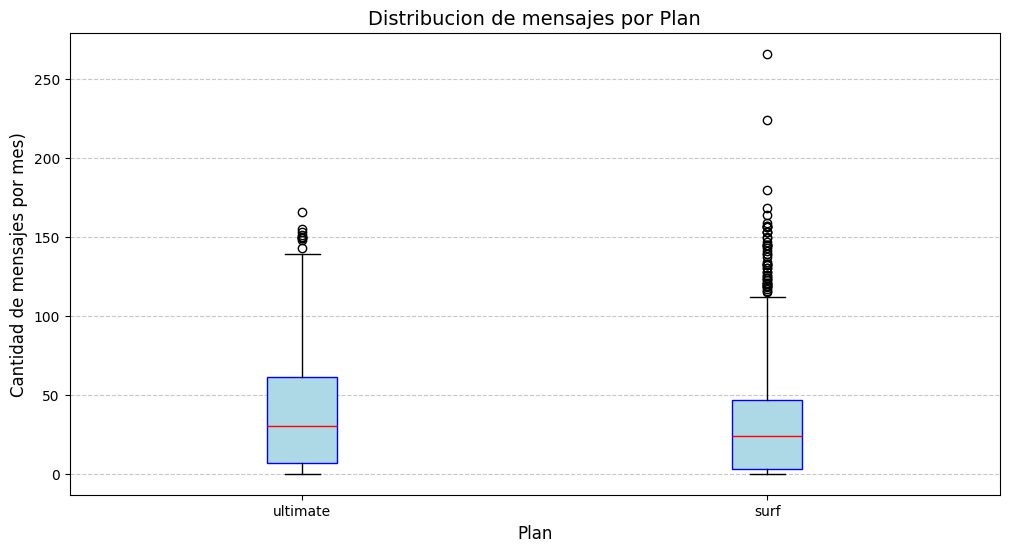

In [161]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes por mes

# Preparacion de datos
box_plans = full_data['plan_name'].unique()
box_data = [full_data[full_data['plan_name'] == plan]['total_messages']for plan in box_plans]

# Creacion de diagrama
fig, box = plt.subplots(figsize=(12, 6))
box.boxplot(box_data, labels=box_plans, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))

# Personalizar el gráfico
box.set_title('Distribucion de mensajes por Plan', fontsize=14)
box.set_xlabel('Plan', fontsize=12)
box.set_ylabel('Cantidad de mensajes por mes)', fontsize=12)
box.grid(axis='y', linestyle='--', alpha=0.7)

plt.show(box)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

CONCLUSIONES

- EN EL PLAN ULTIMATE, SE PUEDE OBSERVAR QUE EFECTIVAMENTE SE MANDAN MAS MENSAJES QUE EN EL PLAN SURF, SIN EMBARGO, PODEMOS OBSERVAR QUE HAY UN CRECIMIENTO EN CADA PLAN, CONFORME VAN AVANZANDO LOS MESES, OSEA, EN CADA MES, AMBOS PLANES INCREMENTAN SU NUMERO DE MENSAJES UTILIZADOS.
- SE PUEDE OBSERVAR QUE LAS MEDIAS SON CASI IGUALES, PERO EL PLAN ULTIMATE TIENE UNA TENDENCIA MAS ALTA, A SU VEZ, VEMOS QUE LA CAJA TIENDE A TENER MUCHOS MAS DATOS EN SU INTERCUARTIL QUE EL PLAN SURF.
-  LA CANTIDAD DE OUTLINERS EN EL PLAN SURF ES MUCHO MAYOR QUE EN EL PLAN ULTIMATE.

GRRACIAS A ESTE ANALISIS SE COMPRENDE AHORA QUE EL PLAN SURF TIENDE A UTILIZAR SI, MENOS MENSAJES QUE EL PLAN ULTIMATE, SIN EMBARGO, HAY VARIOS DATOS QUE SE SALIERON DEL RANGO.

### Internet

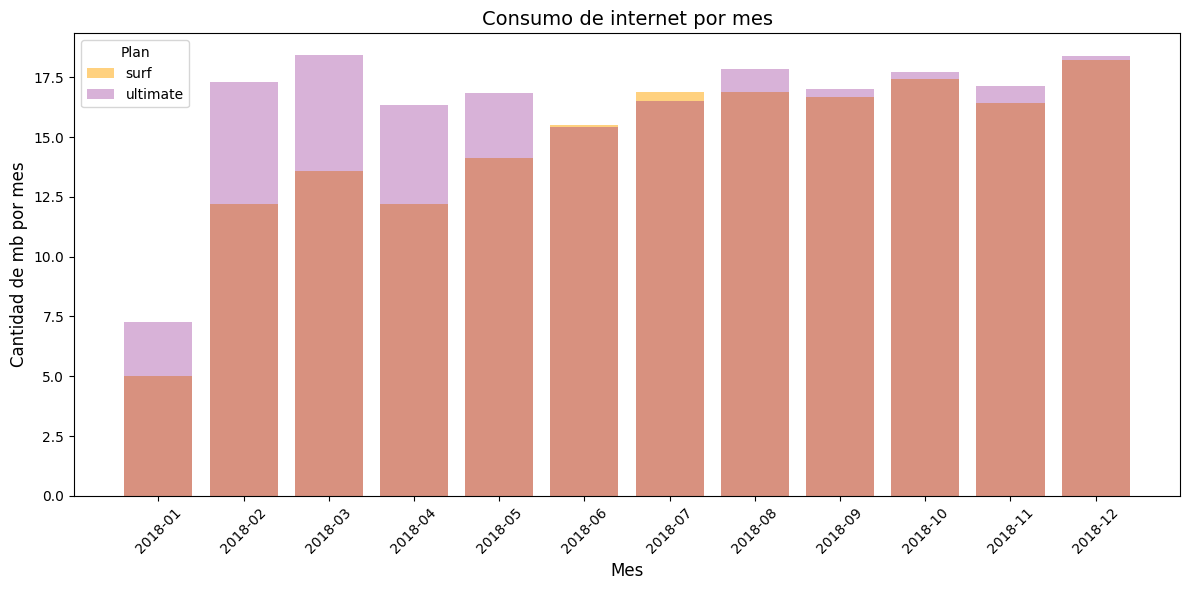

In [162]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_mb_duration = full_data.groupby(['plan_name', 'year_month'])['total_gb'].mean().reset_index()
avg_mb_duration['year_month'] = avg_mb_duration['year_month'].astype(str) 

# Datos para el grafico
avg_plans = avg_mb_duration['plan_name'].unique()
x_label = avg_mb_duration['year_month'].unique()

# Crear grafico de barras
fig, ax = plt.subplots(figsize=(12,6))
for plan in avg_plans:
    data = avg_mb_duration[avg_mb_duration['plan_name'] == plan]

    # Atenuar el color de un plan específico, por ejemplo 'Plan Básico'
    if plan == 'surf':
        ax.bar(data['year_month'], data['total_gb'], label=plan, alpha=0.5, color='orange')
    else:
        ax.bar(data['year_month'], data['total_gb'], label=plan, alpha=0.3, color='purple')  


ax.set_title('Consumo de internet por mes', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Cantidad de mb por mes', fontsize=12)
ax.legend(title="Plan")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [163]:
# Calcula la media y la varianza de la cantidad de megabytes utilizados al mes.

# Calculo de la media
total_mb_mean = full_data['total_gb'].mean()

# Calculo de la varianza
total_mb_var = full_data['total_gb'].var()

# Imprimimos resultados
print('La media es:', total_mb_mean)
print('la varianza es:', total_mb_var)

La media es: 16.870475359790667
la varianza es: 60.780336466779175


/var/folders/mw/frc8gt413314ssp_571x0spw0000gn/T/ipykernel_3189/2361913050.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box.boxplot(box_data, labels=box_plans, patch_artist=True, boxprops=dict(facecolor='lightblue', color='red'), medianprops=dict(color='green'))


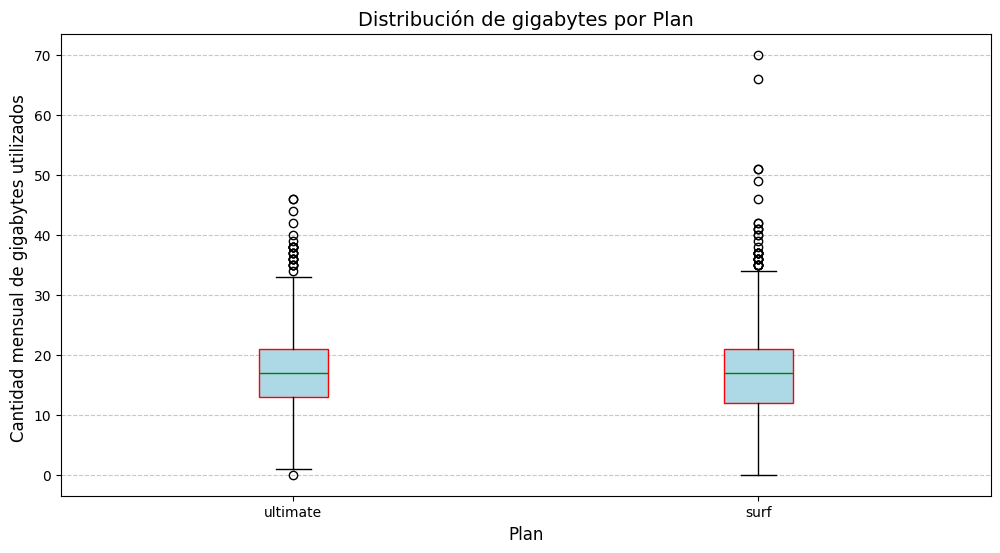

In [164]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Preparacion de datos
box_plans = full_data['plan_name'].unique()
box_data = [full_data[full_data['plan_name'] == plan]['total_gb']for plan in box_plans]

# Creacion de diagrama
fig, box = plt.subplots(figsize=(12, 6))
box.boxplot(box_data, labels=box_plans, patch_artist=True, boxprops=dict(facecolor='lightblue', color='red'), medianprops=dict(color='green'))

# Personalizar el gráfico
box.set_title('Distribución de gigabytes por Plan', fontsize=14)
box.set_xlabel('Plan', fontsize=12)
box.set_ylabel('Cantidad mensual de gigabytes utilizados ', fontsize=12)
box.grid(axis='y', linestyle='--', alpha=0.7)

plt.show(box)

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

CONCLUSIONES

- PODEMOS OBSERVAR QUE LA MEDIA EN AMBOS PLANES ESTAN POR EL MISMO LUGAR, sin embargo, la cantidad intercuartil del plan surf es mayor a la del plan ultimate, tambien vemos que sus bigotes tienden a ser mas largos,
- se observa que el plan surf tiene mas outliners, señal de que hay personas que podrian estar utilizando mucho mas de lo que les incluye su plan, de hecho la media esta muy por encima de ello.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [165]:
income_stats = full_data.groupby('plan_name')['total_cost'].describe()

print(income_stats)

            count       mean        std   min   25%   50%   75%     max
plan_name                                                              
surf       1573.0  58.862638  54.549029  20.0  20.0  40.0  80.0  572.28
ultimate    720.0  72.313889  11.395108  70.0  70.0  70.0  70.0  182.00


/var/folders/mw/frc8gt413314ssp_571x0spw0000gn/T/ipykernel_3189/3247227140.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=plans, patch_artist=True, boxprops=dict(facecolor='lightblue'))


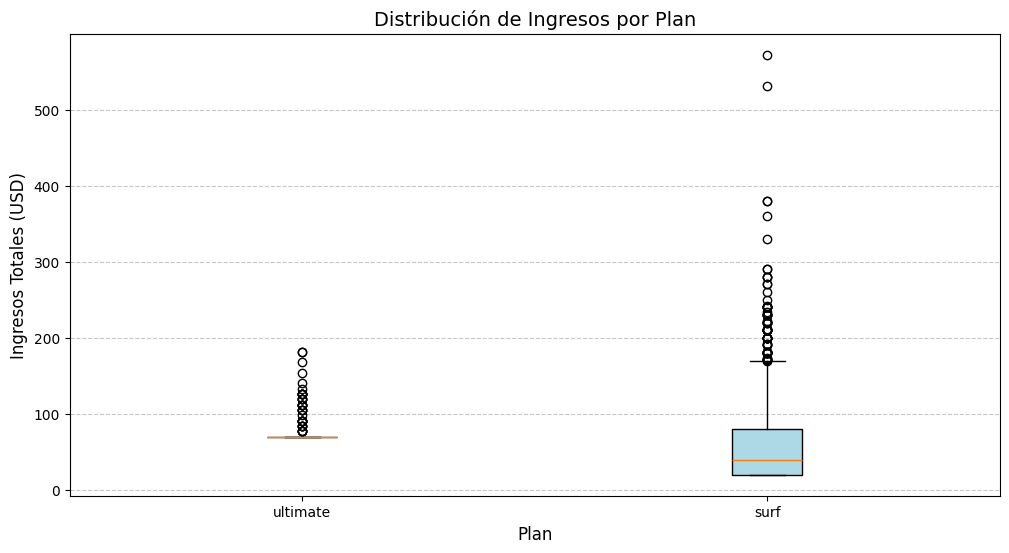

In [166]:
# Crear un diagrama de caja para visualizar la distribución de ingresos por plan
plt.figure(figsize=(12, 6))
plans = full_data['plan_name'].unique()

# Crear listas de ingresos por plan
data_to_plot = [full_data[full_data['plan_name'] == plan]['total_cost'] for plan in plans]

# Diagrama de caja
plt.boxplot(data_to_plot, labels=plans, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Personalización del gráfico
plt.title("Distribución de Ingresos por Plan", fontsize=14)
plt.xlabel("Plan", fontsize=12)
plt.ylabel("Ingresos Totales (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

CONCLUSIONES

PODEMOS OBSERVAR QUE LA MEDIA DE CADA PLAN ESTA BASICAMENTE EN SU PAGO MENSUAL, SIN EMBARGO, EL PLAN SURF TIENE UNA GRAN TENDENCIA A GENERAR MUCHOS MAS INGRESOS EXTRAS QUE EL PLAN ULTIMATE, ESTO SE DEBE A QUE NO LES ALCANZA LO QUE TIENEN INCLUIDO Y POR ENDE GASTAN MAS DE LO QUE YA TIENEN INCLUIDDO.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [167]:
# Prueba las hipótesis 

# Separar los ingresos por tipo de plan
surf_income = full_data[full_data['plan_name'] == 'surf']['total_cost']
ultimate_income = full_data[full_data['plan_name'] == 'ultimate']['total_cost']

# Prueba T

alpha = 0.5
stat, p_value = st.ttest_ind(surf_income, ultimate_income, equal_var=False)

# Resultados
print("Resultados de la prueba t:")
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Existe una diferencia significativa entre los ingresos de los planes.")
else:
    print("\nNo se puede rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos son diferentes.")



Resultados de la prueba t:
Estadístico de prueba: -9.344718611813233
Valor p: 2.5613755181532966e-20

Rechazamos la hipótesis nula: Existe una diferencia significativa entre los ingresos de los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [168]:
# Prueba las hipótesis

# Unimos la ciudad a nuesto DF
users_city = users[['user_id', 'city']]
full_data_city = pd.merge(full_data, users_city, how='left', on='user_id')

print(full_data_city.sample(3))

     user_id year_month plan_name  total_calls  total_minutes  total_messages  \
498     1106    2018-06      surf         77.0           77.0             0.0   
1964    1418    2018-12      surf         42.0           42.0             0.0   
54      1012    2018-12      surf         16.0           16.0             0.0   

      minutes_included  usd_per_minute  total_gb  messages_included  \
498                500            0.03      19.0                 50   
1964               500            0.03      41.0                 50   
54                 500            0.03      12.0                 50   

      usd_per_message  mb_per_month_included  usd_monthly_pay  usd_per_gb  \
498              0.03                  15360               20        10.0   
1964             0.03                  15360               20        10.0   
54               0.03                  15360               20        10.0   

      extra_cost  total_cost                                       city  
498    

In [169]:
# Separamos los ingresos

ny_total_income =  0
other_cities_total_income = 0

for _, row in full_data_city.iterrows():
    if row['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        ny_total_income += row['total_cost']
    else:
        other_cities_total_income += row['total_cost']

print('ingreso total de NY:', ny_total_income)
print('ingreso total de las demas ciudades:', other_cities_total_income)

ingreso total de NY: 22081.460000000003
ingreso total de las demas ciudades: 122575.46999999991


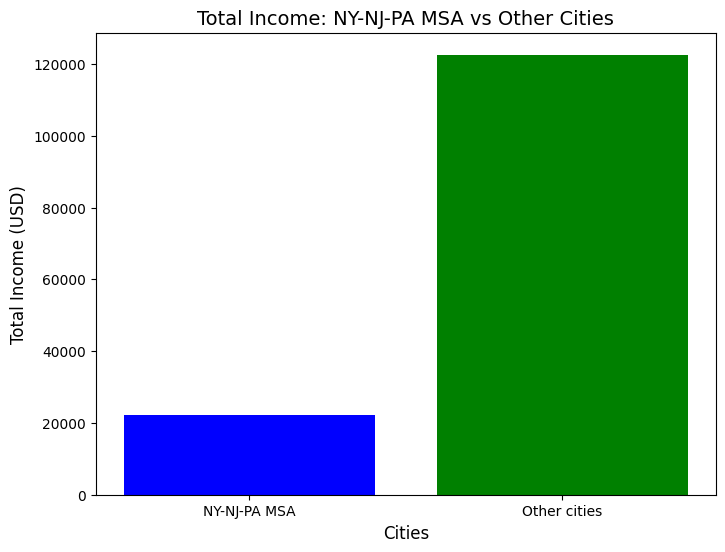

In [170]:
# Grafico de barras

# Datos del grafico
cities = ['NY-NJ-PA MSA', 'Other cities']
total_incomes =  [ny_total_income, other_cities_total_income]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(cities, total_incomes, color=['blue', 'green'])
plt.title('Total Income: NY-NJ-PA MSA vs Other Cities', fontsize=14)
plt.ylabel('Total Income (USD)', fontsize=12)
plt.xlabel('Cities', fontsize=12)
plt.show()

In [171]:
# Prueba de hipotesis

# Dividimos en grupos las ciudades
ny_data = full_data_city[full_data_city['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_cost']
other_cities_data = full_data_city[full_data_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_cost']

stat, p_value = st.ttest_ind(ny_data, other_cities_data, equal_var=False)

# Imprimir los resultados
print("Estadístico t:", stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: existe una diferencia significativa en los ingresos promedio.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")

Estadístico t: -2.1923231649466426
Valor p: 0.028765503550625456
Rechazamos la hipótesis nula: existe una diferencia significativa en los ingresos promedio.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

CONCLUSIONES:

- podemos observar que los clientes con el plan 'surf' tienen mayores consumos que los incluidos en su pla, por lo tanto generan mas ingresos extra que el plan 'ultimate'
- los usuarios del plan 'ultimate' tienden a casi no rebasar sus limites en su plan.
- los datos de NY - NJ son mmucho mas bajos que todas las demas ciudades, por lo tanto no son una zona principal.
- en general, se tiene un mayor ingreso, por los mb extras.
- la mensajeria ha ido en alsa al pasar el tiempo.